In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import math
import matplotlib.ticker as mticker
import matplotlib

IMAGE_SIZE=9775

In [ ]:
def plot_grid(matrix, vector, title):
    # Set the size of the figure and layout
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    
    # Create a subplot
    fig, ax = plt.subplots()
    
    # Display the matrix as an image with color scaling based on the vector values
    cax = ax.imshow(matrix, vmin=min(np.array(vector)), vmax=max(np.array(vector)), cmap='hot')
    
    # Set the title of the plot
    ax.set_title(title)
    
    # Set the limits for the x and y axes to focus on a specific region
    ax.set_xlim([0.5, 10.5])
    ax.set_ylim([10.5, 0.5])

    # Define labels for the axes ticks
    labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

    # Set the x-ticks at specific positions with the defined labels
    ax.set_xticks(np.arange(1, 11) - 0.5, labels)
    
    # Define an offset for x-tick labels for better visual alignment
    dx = 10/72.; dy = 0/72.
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    
    # Apply the offset transform to all x-tick labels
    for label in ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

    # Set the y-ticks at specific positions with the defined labels
    ax.set_yticks(np.arange(1, 11) - 0.5, labels)
    
    # Define an offset for y-tick labels for better visual alignment
    dx = 1/72.; dy = 10/72.
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    
    # Apply the offset transform to all y-tick labels
    for label in ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() - offset)
    
    # Add grid lines with specific style
    grid = ax.grid(color='k', linestyle='--', linewidth=0.4)

    # Define labels for the colorbar ticks
    labels_colorbar = np.linspace(min(np.array(vector)), round(max(np.array(vector))), 5)
    
    # Add colorbar to the figure with specified tick locations
    cbar = fig.colorbar(cax, extend='max', ticks=labels_colorbar)


In [ ]:

def plot_3d_histogram(x, y, data, riscaling_factor, title):
    # Configure figure size and layout
    plt.rcParams["figure.figsize"] = [10, 10]
    plt.rcParams["figure.autolayout"] = True

    # Create a new figure and a 3D subplot
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')

    # Rescale the data
    rescaled_data = [(value - riscaling_factor) for value in data]
    color_data = rescaled_data
    z3 = np.ones(len(x)) * riscaling_factor
    dx = np.ones(len(x)) * 0.9
    dy = np.ones(len(x)) * 0.9

    # Define color mapping
    cmap = matplotlib.colormaps['hot']
    max_height = np.max(color_data)
    min_height = np.min(color_data)
    rgba = [cmap((k - min_height) / (max_height - min_height)) for k in color_data]

    # Plot the 3D bars
    ax1.bar3d(y, x, z3, dx, dy, rescaled_data, color=rgba)
    ax1.axis('on')
    ax1.set(xlim=(1, 10.5), ylim=(1, 10.5))

    # Set axis ticks and labels
    labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    ax1.set_xticks(np.arange(1, 11) - 0.3, labels)
    ax1.set_yticks(np.arange(1, 11) - 0.3, labels)
    ax1.set_xlabel('X Axis', fontsize=20)
    ax1.set_ylabel('Y Axis', fontsize=20)

    # Set plot title
    ax1.set_title(title, fontsize=30)

    # Define colorbar ticks
    labels_colorbar = np.linspace(min(data), round(max(data)), 5)

    # Change the point of view
    ax1.view_init(90, 45)

    # Display the plot
    plt.show()


In [ ]:
def plot_3d_surface(x,y,data, title):

    plt.style.use('_mpl-gallery')
    plt.rcParams["figure.figsize"] = [10, 10]
    plt.rcParams["figure.autolayout"] = True


    coordinate_y_offset=[coor-0.5 for coor in y ]
    coordinate_x_offset=[coor-0.5 for coor in x ]

    cmap = matplotlib.colormaps['turbo']
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

    p=ax.plot_trisurf(coordinate_y_offset, coordinate_x_offset, data, vmin=min(np.array(data)), cmap=cmap)
    ax.set(xlim=(1, 10.3), ylim=(1, 10.3))
    labels=['1','2','3','4','5','6','7','8','9','10']
    ax.set_xticks(np.arange(1,11)-0.5, labels)
    labels=['1','2','3','4','5','6','7','8','9','10']
    ax.set_yticks(np.arange(1,11)-0.5, labels)

    ax.set_title(title, fontsize=30)
    ax.view_init(40, 45)
    plt.show()

In [ ]:
#File with the real information about the transmission
path='grid_file_index.txt'
data=[] 
with open(path, 'r') as file:
    # Read the content of the file line by line
    for line in file:
        # Split the line based on the semicolon delimiter
        data.append(line)

In [ ]:
#Readthe information from the file and save them in list
cell_number_double=[]
latitude=[]
longitude=[]
tx_time=[]
total_tx_time=[]
re_tx_time=[]
missing_packet=[]
rssi=[]
bit_rate=[]
for line in data:
# Split the string based on the semicolon delimiter
    information = line.split(';')
    if information[0]=='Z9':
        continue

    cell_number_double.append(information[0])
    latitude.append(float(information[1]))
    longitude.append(float(information[2]))

    if 'Error has occured' in information:
        total_tx_time.append(80)
        tx_time.append(float(0))
        missing_packet.append(2000)
        re_tx_time.append(float(0))
        rssi.append(float(140))
        bit_rate.append(float(0))
    else:
        #It means that the transmission is a failure
        if float(information[3])>2000:
            missing_packet.append(2000)
            total_tx_time.append(80)
            rssi.append(140)
            bit_rate.append(0)
        else:
            missing_packet.append(float(information[3]))
            total_tx_time.append(round(float(information[5])))
            rssi.append(float(information[7]))
            bit_rate.append(float(information[8]))
        
        tx_time.append(float(information[4]))        
        re_tx_time.append(float(information[6]))        
        

In [ ]:
#Compute the mean of the various measurments
rssi_mean=[]
cell_number=[]
total_time_tx_mean=[]
missing_packet_mean=[]
bit_rate_mean=[]

for cell in cell_number_double:
    index_cell = [index for index, value in enumerate(cell_number_double) if value == cell]
    if cell in cell_number:
        continue
    
    bitRateMean=0
    timeTotMean=0
    rssiMean=0
    missingPacketMean=0
    if index_cell:
        for i in index_cell:
            #insert all the value
            timeTotMean+=total_tx_time[i]
            rssiMean+=rssi[i]
            missingPacketMean+=missing_packet[i]
            bitRateMean+= bit_rate[i]
        #It does the mean
        rssi_mean.append(rssiMean/len(index_cell))
        total_time_tx_mean.append(timeTotMean/len(index_cell))
        missing_packet_mean.append(missingPacketMean/len(index_cell))
        bit_rate_mean.append(bitRateMean/len(index_cell))
        cell_number.append(cell)
        


In [ ]:

coordinate_x=[]
coordinate_y=[]
letter_to_number = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'L': 10}
for cell in cell_number:    
    coordinate_x.append(int(cell[1]))
    coordinate_y.append(letter_to_number[cell[0]])




coordinate_x_extended=[]
coordinate_y_extended=[]
rssi_extended=[]
counter=0
#the first two for loop ae used to find all the possible combination
for x in range(1,11):
    for y in range(1,11):
        find=False
        #This for loop is used to check if the combination of coordinate exist
        for i in range(len(coordinate_x)):
            #if the cooridnate are found in the coordinate mapped
            if (str(x)+str(y))==(str(coordinate_x[i])+str(coordinate_y[i])):
                       
                coordinate_x_extended.append(coordinate_x[i])
                coordinate_y_extended.append(coordinate_y[i])
                rssi_extended.append(-rssi_mean[i])
                find=True
                break
        if not(find):
            coordinate_x_extended.append(x)
            coordinate_y_extended.append(y)
            rssi_extended.append(-140)

Syntax: view_init(elev, azim)

Parameters: 

‘elev’ stores the elevation angle in the z plane.
‘azim’ stores the azimuth angle in the x,y plane.D constructo

C:\Users\steba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


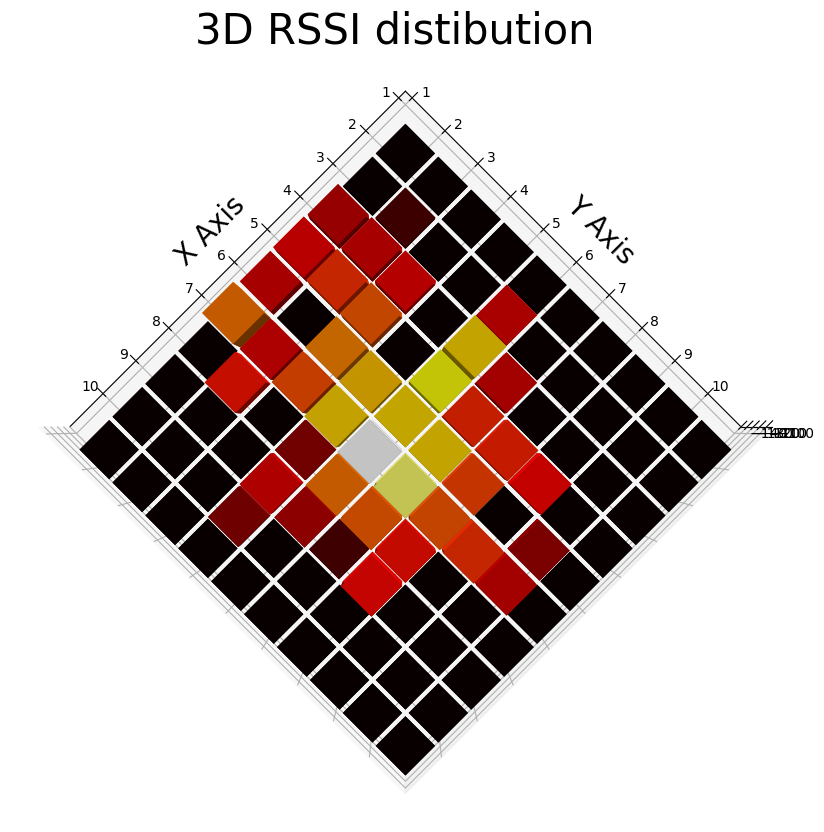

In [ ]:

plot_3d_histogram(coordinate_x_extended, coordinate_y_extended, rssi_extended, -140, '3D RSSI distibution' )

C:\Users\steba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


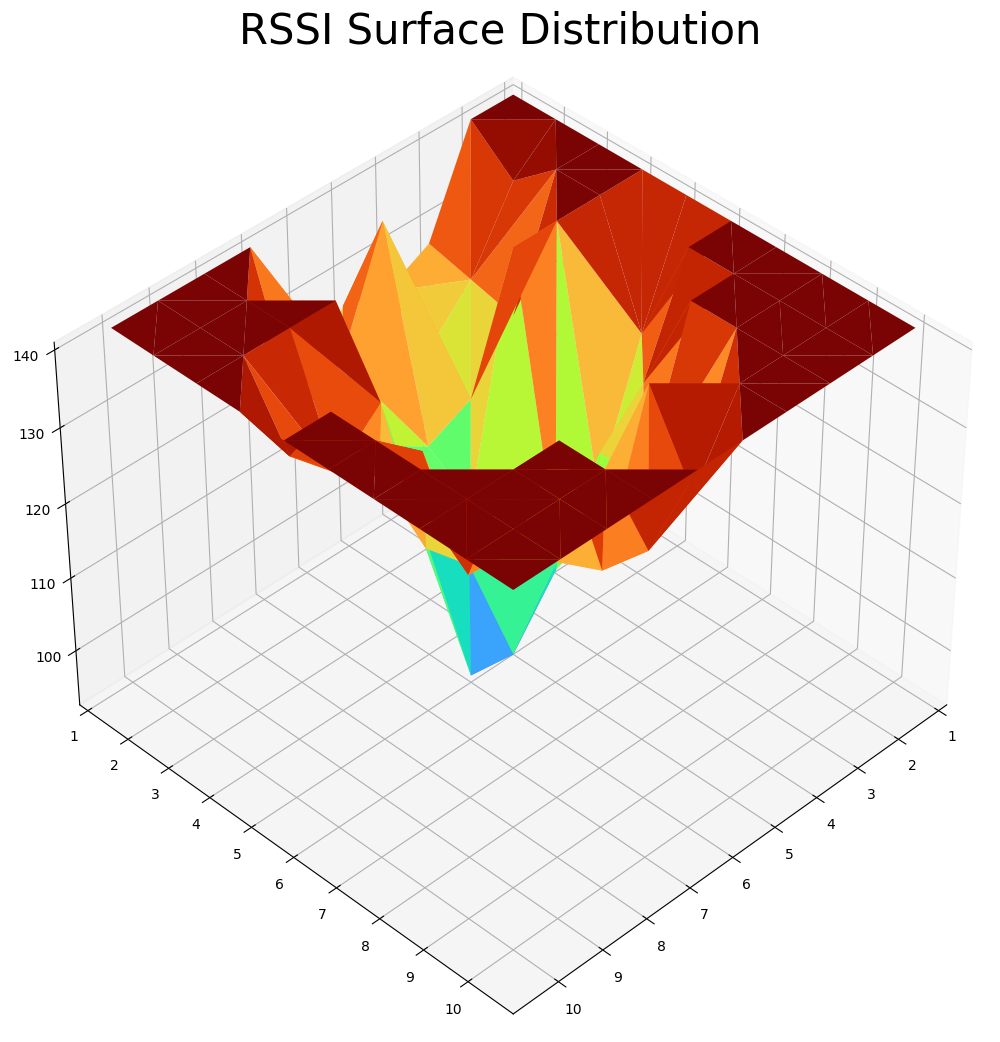

In [ ]:

rssi_extended_reverse=[-value for value in rssi_extended]
plot_3d_surface(coordinate_x_extended, coordinate_y_extended, rssi_extended_reverse, 'RSSI Surface Distribution')


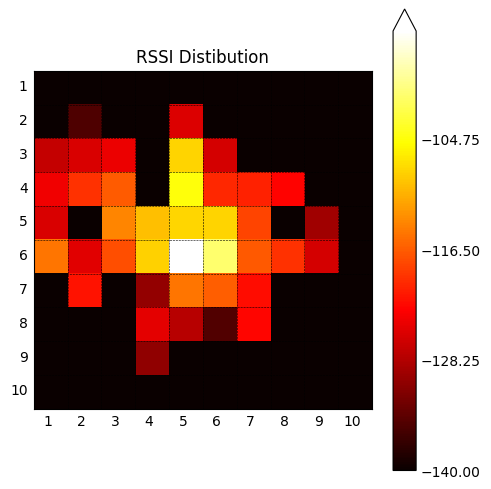

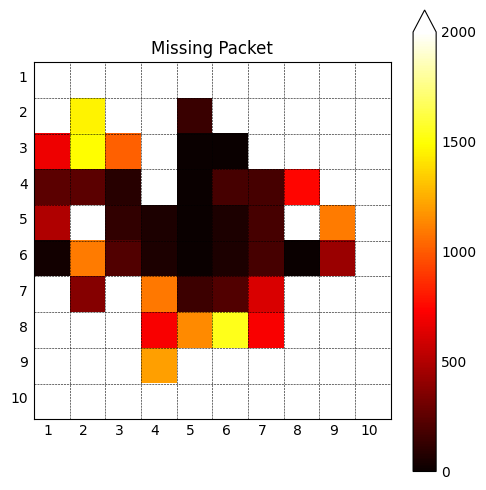

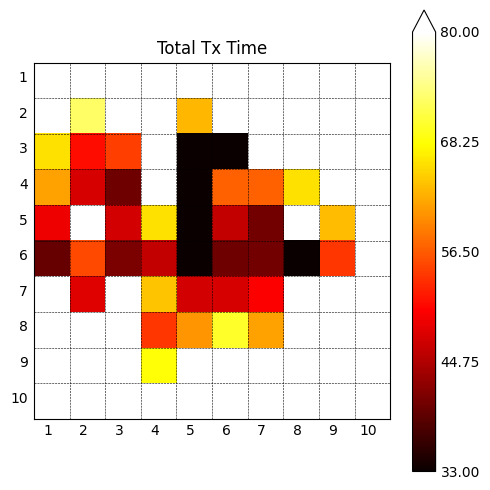

In [ ]:
#matrix
rssi_matrix = np.ones((11, 11))*140
for i in range(len(coordinate_x_extended)):
    rssi_matrix[coordinate_y_extended[i], coordinate_x_extended[i]] =rssi_extended[i]

total_tx_time_matrix = np.ones((11, 11))*100
for i in range(len(coordinate_x)):
    total_tx_time_matrix[coordinate_y[i], coordinate_x[i]] = total_time_tx_mean[i]

missing_packet_matrix = np.ones((11, 11))*2000
for i in range(len(coordinate_x)):
    missing_packet_matrix[coordinate_y[i], coordinate_x[i]] = missing_packet_mean[i]


#Plot the graph

plot_grid(rssi_matrix, rssi_extended, 'RSSI Distibution')

plot_grid(missing_packet_matrix, missing_packet_mean, 'Missing Packet')

plot_grid(total_tx_time_matrix, total_time_tx_mean, 'Total Tx Time')


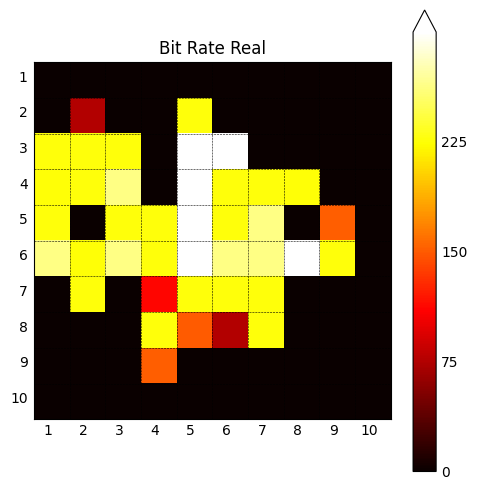

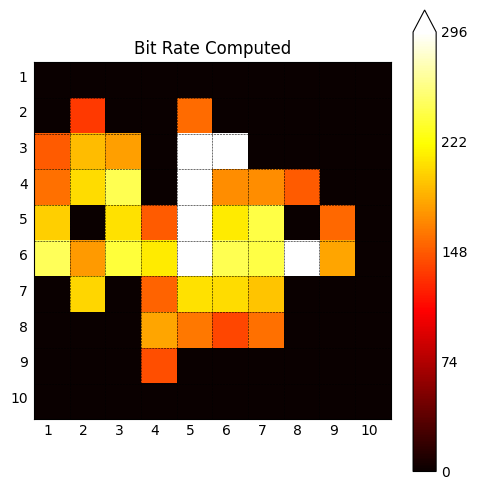

In [ ]:
#plot the bitrate
bit_rate_matrix = np.ones((11, 11))*0
for i in range(len(coordinate_x)):
    bit_rate_matrix[coordinate_y[i], coordinate_x[i]] =bit_rate_mean[i]


plot_grid(bit_rate_matrix, bit_rate_mean, 'Bit Rate Real')


bit_rate_compute=[]
bit_rate_matrix_2 = np.ones((11, 11))*0
for i in range(len(coordinate_x)):
    if total_time_tx_mean[i]>=80:
        bit_rate_compute.append(0)
    else:
        bit_rate_compute.append(int(IMAGE_SIZE/total_time_tx_mean[i]))

    bit_rate_matrix_2[coordinate_y[i], coordinate_x[i]]=bit_rate_compute[i]

plot_grid(bit_rate_matrix_2, bit_rate_compute, 'Bit Rate Computed')

#Save the data about the bitrate in a .txt file 
np.savetxt("my_matrix.txt", bit_rate_matrix_2,fmt='%.4e', delimiter=",")


Minimum value (excluding 0): 130.17
Maximum value (excluding 0): 275.0
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         15.78679094  0.          0.         20.69509186  0.
   0.          0.          0.          0.        ]
 [15.77470572 20.76034774 21.47913436  0.         40.35885167 40.35429957
   0.          0.          0.          0.        ]
 [11.69217687 20.37691402 22.99157799  0.         22.70863642 32.83491307
  15.04545725  9.38241371  0.          0.        ]
 [23.70282239  0.          8.20505004 23.21467761 13.22545455 16.93328593
  22.19725343 36.00725718 19.31345354  0.        ]
 [24.55605555 17.7648855  26.9599218  17.04745167 16.82067149 15.72684554
  17.04745167 38.81208397  9.34065934  0.        ]
 [ 0.         23.20125786 19.57337884 20.35347777 14.53113088  1.95306807
  21.80645161  0.          0.          0.        ]
 [ 0.          0.          0.         14.32389401 18.84444444 20.42172

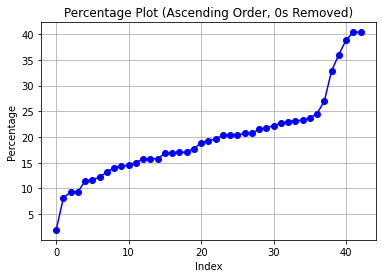

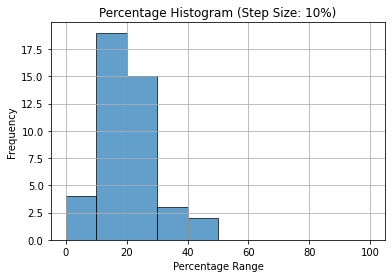

In [25]:
#check what is the maximum std percentage wrt the mean matrix
# Step 1: Load the data from the text files
mean_file = "my_matrix_bitrate_mean.txt"  # Path to your mean file
std_file = "my_matrix_bitrate_std.txt"    # Path to your std file

# Assuming the data is stored as CSV (comma-separated values)
mean_array = np.loadtxt(mean_file, delimiter=',')
std_array = np.loadtxt(std_file, delimiter=',')

mean_array_without_0=mean_array[mean_array!=0]

# Find the minimum and maximum values excluding 0
min_value = np.min(mean_array_without_0)
max_value = np.max(mean_array_without_0)

print("Minimum value (excluding 0):", min_value)
print("Maximum value (excluding 0):", max_value)

# Step 2: Calculate the percentage of std over the mean
# We will use numpy's division and handle division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    percentage_array = (std_array / mean_array) * 100

#percentage_array = percentage_array.flatten()


# Step 3: Optionally, you can replace any NaNs or infinities that result from division by zero
percentage_array = np.nan_to_num(percentage_array, nan=0.0, posinf=0.0, neginf=0.0)
print(percentage_array)

# Filter out 0 values and sort the remaining values in ascending order
filtered_percentages = sorted([p for p in percentage_array.flatten() if p != 0])

# Plotting the filtered and sorted list
plt.plot(filtered_percentages, marker='o', linestyle='-', color='b')
plt.title('Percentage Plot (Ascending Order, 0s Removed)')
plt.xlabel('Index')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

# Define the bin edges with a step size of 10%
bins = range(0, 101, 10)  # Bins from 0 to 100 with a step of 10

# Plotting the histogram
plt.hist(filtered_percentages, bins=bins, edgecolor='black', alpha=0.7)

# Adding titles and labels
plt.title('Percentage Histogram (Step Size: 10%)')
plt.xlabel('Percentage Range')
plt.ylabel('Frequency')
plt.grid(True)

# Display the histogram
plt.show()

[11, 14, 20, 21, 22, 24, 25, 30, 31, 32, 34, 35, 36, 37, 40, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 65, 66, 73, 74, 75, 76, 83, 86]
43


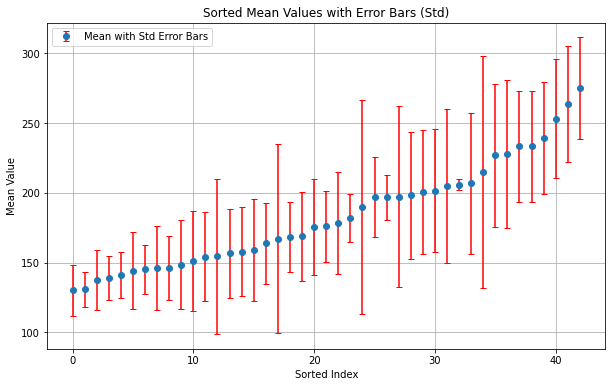

In [16]:
#plot the sorted mean in accending order along with the std
flattened_mean=mean_array.flatten()
flattened_std = std_array.flatten()

non_zero_indices = [i  for i in range(len(flattened_mean)) if flattened_mean[i]!=0 ]
print(non_zero_indices)
filtered_mean = flattened_mean[non_zero_indices]
filtered_std = flattened_std[non_zero_indices]

# Step 3: Sort the mean array and get the indices of the sorted array
sorted_indices = np.argsort(filtered_mean)
sorted_mean = filtered_mean[sorted_indices]
sorted_std = filtered_std[sorted_indices]

print(len(sorted_indices))


# Step 4: Plot the sorted mean values with error bars representing the std values
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(sorted_mean)), sorted_mean, yerr=sorted_std, fmt='o', ecolor='red', capsize=3, label='Mean with Std Error Bars')
plt.xlabel("Sorted Index")
plt.ylabel("Mean Value")
plt.title("Sorted Mean Values with Error Bars (Std)")
plt.grid(True)
plt.legend()
plt.show()
